# Mini Project: Trees and Forests

Working with decision trees, random forests, and AdaBoost on the breast cancer dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

## Load the data

First let's load the breast cancer dataset and split it up

In [2]:
# Load the dataset
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

In [3]:
# Split into train/test
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Check the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Decision Tree

Let's try a decision tree classifier first

In [5]:
# Train a decision tree
tree_model = DecisionTreeClassifier(random_state=99)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=99)

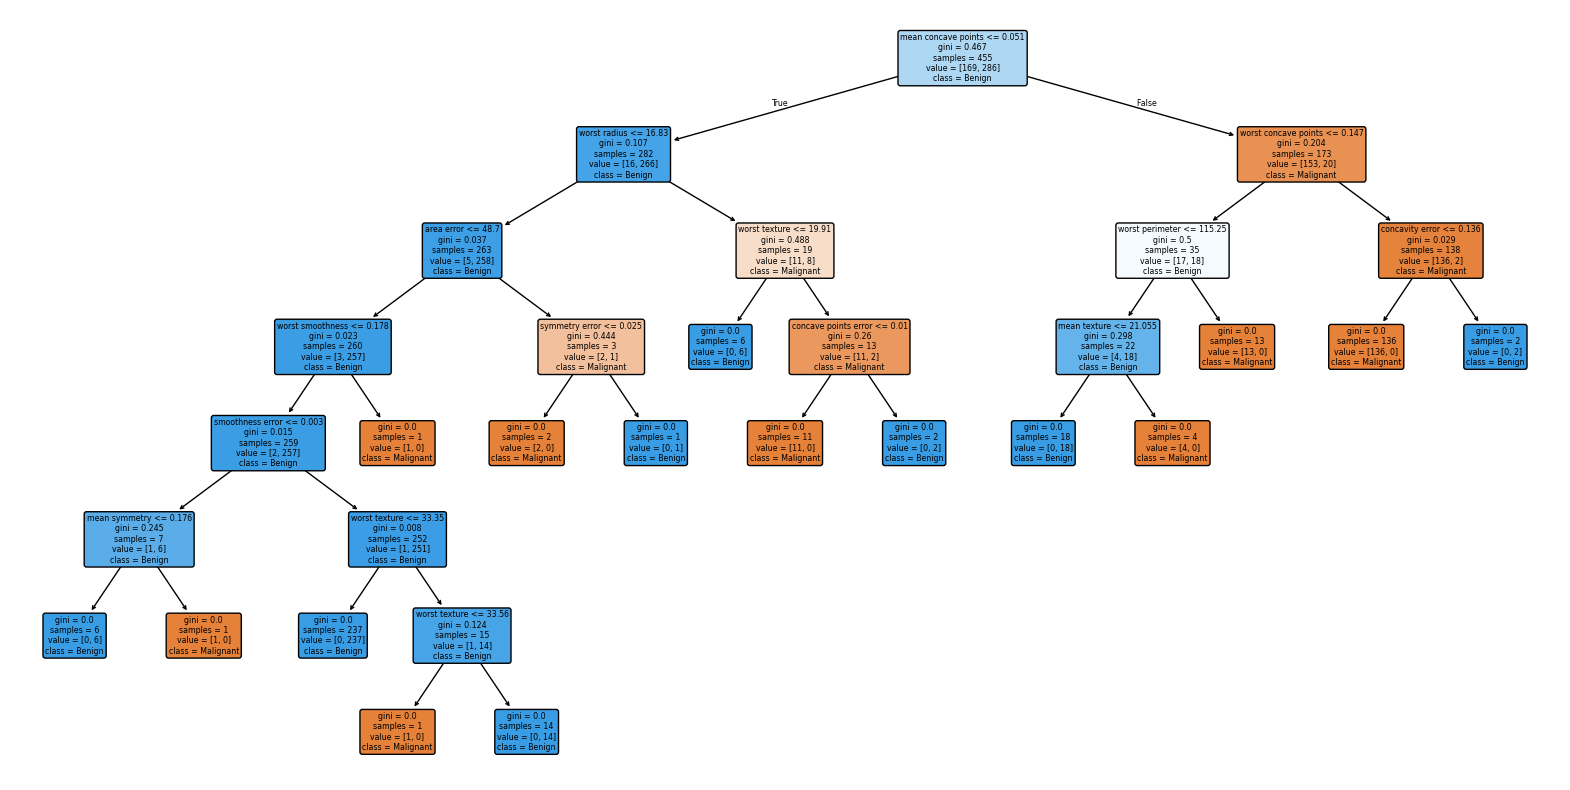

In [6]:
# Look at the tree structure
plt.figure(figsize=(20,10))
plot_tree(tree_model, 
         feature_names=X.columns, 
         class_names=['Malignant', 'Benign'], 
         filled=True, 
         rounded=True)
plt.show()

In [7]:
# Try different max_depth values to see the effect
depths = [3, 5, 10, None]
for depth in depths:
    tree_model_tuned = DecisionTreeClassifier(max_depth=depth, random_state=99)
    tree_model_tuned.fit(X_train, y_train)
    train_score = tree_model_tuned.score(X_train, y_train)
    test_score = tree_model_tuned.score(X_test, y_test)
    print(f"Max Depth: {depth}, Train Score: {train_score:.3f}, Test Score: {test_score:.3f}")

Max Depth: 3, Train Score: 0.978, Test Score: 0.947
Max Depth: 5, Train Score: 0.996, Test Score: 0.939
Max Depth: 10, Train Score: 1.000, Test Score: 0.939
Max Depth: None, Train Score: 1.000, Test Score: 0.939


## Random Forest

Now let's try a random forest classifier

In [8]:
# Train a random forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=99)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=99)

In [9]:
# Check feature importances
feature_importances = dict(zip(X.columns, rf_model.feature_importances_))
sorted_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

In [10]:
# Show top features
sorted_importances

{'worst area': 0.14694572117839091,
 'mean concave points': 0.12924897427915838,
 'worst radius': 0.12555116296783964,
 'worst concave points': 0.1225131478979749,
 'worst perimeter': 0.09928642668485566,
 'mean concavity': 0.05525813527027857,
 'mean perimeter': 0.04219241713226383,
 'mean area': 0.03951299967306753,
 'worst concavity': 0.035106220493526116,
 'mean radius': 0.027564498808056972,
 'worst texture': 0.020200344926880814,
 'worst compactness': 0.017590365475795525,
 'mean compactness': 0.017432520488152033,
 'worst symmetry': 0.01464968792240033,
 'area error': 0.013762581768942751,
 'radius error': 0.012777871215006772,
 'mean texture': 0.012659699764943437,
 'worst smoothness': 0.010355802229422811,
 'perimeter error': 0.006807961757527187,
 'mean smoothness': 0.006716792034638083,
 'worst fractal dimension': 0.0060356695962205595,
 'compactness error': 0.0052521045280519265,
 'concavity error': 0.005185295140892768,
 'mean fractal dimension': 0.005168071071447027,
 'fr

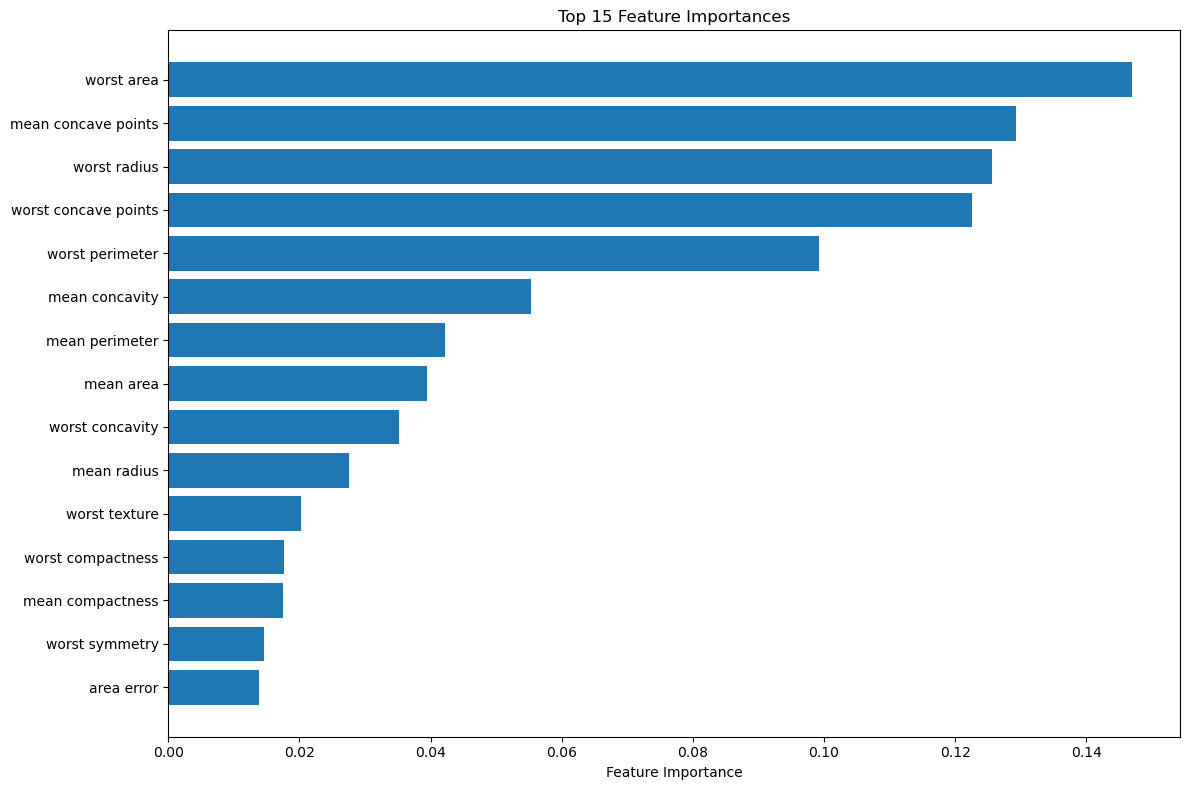

In [11]:
# Plot feature importances
plt.figure(figsize=(12, 8))
features = list(sorted_importances.keys())[:15]
importances = list(sorted_importances.values())[:15]

plt.barh(range(len(features)), importances)
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## AdaBoost

Now let's try AdaBoost with a weak learner

In [12]:
# Train AdaBoost
ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1, random_state=99),
    n_estimators=100,
    random_state=99
)
ada_model.fit(X_train, y_train)

/opt/anaconda3/envs/data_science_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=99),
                   n_estimators=100, random_state=99)

In [13]:
# Compare all models
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada * 100:.2f}%")

y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Tree Accuracy: {accuracy_tree * 100:.2f}%")

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RF Accuracy: {accuracy_rf * 100:.2f}%")


AdaBoost Accuracy: 97.37%
Tree Accuracy: 93.86%
RF Accuracy: 96.49%


## Results

AdaBoost performed best with 97.37% accuracy, followed by Random Forest at 96.49%, and the single decision tree at 94.74%.

The ensemble methods (Random Forest and AdaBoost) performed better than the single decision tree, which makes sense since they combine multiple models.

In [14]:
# Try cross-validation
from sklearn.model_selection import cross_val_score

print("Cross-validation scores (5-fold):")
print(f"Decision Tree: {cross_val_score(tree_model, X, y, cv=5).mean():.3f} (+/- {cross_val_score(tree_model, X, y, cv=5).std() * 2:.3f})")
print(f"Random Forest: {cross_val_score(rf_model, X, y, cv=5).mean():.3f} (+/- {cross_val_score(rf_model, X, y, cv=5).std() * 2:.3f})")
print(f"AdaBoost: {cross_val_score(ada_model, X, y, cv=5).mean():.3f} (+/- {cross_val_score(ada_model, X, y, cv=5).std() * 2:.3f})")

Cross-validation scores (5-fold):
Decision Tree: 0.923 (+/- 0.041)
Random Forest: 0.961 (+/- 0.041)


/opt/anaconda3/envs/data_science_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/data_science_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/data_science_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/data_science_env/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed i

AdaBoost: 0.975 (+/- 0.034)
